In [0]:
!pip install -q quandl

In [2]:
import quandl
import numpy as np 
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## WEIGHTED AVERAGING ENSEMBLE method for Regression-

An ensemble of classifiers is a set of meodels that give an aggregated opinion on **classification** of a new sample but we will apply it for **regression**.

A **weighted ensemble** is a typre of ensemble where the weightage given to each opinion depends on the individual model's **performance**.

### The model weights are small values **between 0 and 1** that represent the percentage or fraction of trust or expeced performance from each model.

The sum of all model weights will equal 1 or 100%.

In [6]:
df=pd.read_csv("/content/drive/My Drive/DM_Project/final_dataset.csv",)
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,0,01-07-2015,Transportation,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,1,02-07-2015,Transportation,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,2,03-07-2015,Transportation,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,3,06-07-2015,Transportation,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,4,07-07-2015,Transportation,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58695,58695,01-04-2020,Media & Entertainment,126.750000,120.000000,124.000000,120.900001,6571413,120.900001,ZEEL,-91.958041,141.136667,30.112364,8.263475
58696,58696,03-04-2020,Media & Entertainment,125.949997,119.050003,123.000000,124.349999,7887911,124.349999,ZEEL,-87.604792,136.716668,31.874355,14.577463
58697,58697,07-04-2020,Media & Entertainment,143.000000,126.650001,129.000000,140.899994,11487040,140.899994,ZEEL,-62.112685,133.923334,39.689528,37.887315
58698,58698,08-04-2020,Media & Entertainment,148.149994,135.250000,138.000000,143.149994,10046602,143.149994,ZEEL,-58.943671,132.376666,40.680751,41.056329


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

In [8]:
df['comp'][40000]

'ONGC'

Choosing company to learn:

In [9]:
df=df[df['comp']=='Adani Ports & SEZ']
df

,Unnamed: 0,date,Category,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,0,2015-07-01,Transportation,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,1,2015-07-02,Transportation,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,2,2015-07-03,Transportation,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,3,2015-07-06,Transportation,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,4,2015-07-07,Transportation,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,1169,2020-04-01,Transportation,247.800003,235.050003,246.050003,244.800003,4034211,244.800003,Adani Ports & SEZ,-57.735080,255.099999,33.572445,42.784031
1170,1170,2020-04-03,Transportation,252.800003,238.899994,246.000000,244.800003,7210403,244.800003,Adani Ports & SEZ,-57.215969,252.243333,33.572445,52.022402
1171,1171,2020-04-07,Transportation,255.850006,245.600006,254.199997,248.100006,7360798,248.100006,Adani Ports & SEZ,-43.870563,249.266667,35.331183,56.129437
1172,1172,2020-04-08,Transportation,255.850006,242.750000,248.000000,250.850006,6897792,250.850006,Adani Ports & SEZ,-40.448037,248.563334,36.824605,68.357152


In [10]:
df.shape

(1174, 14)

## Visualizing the closing price history:

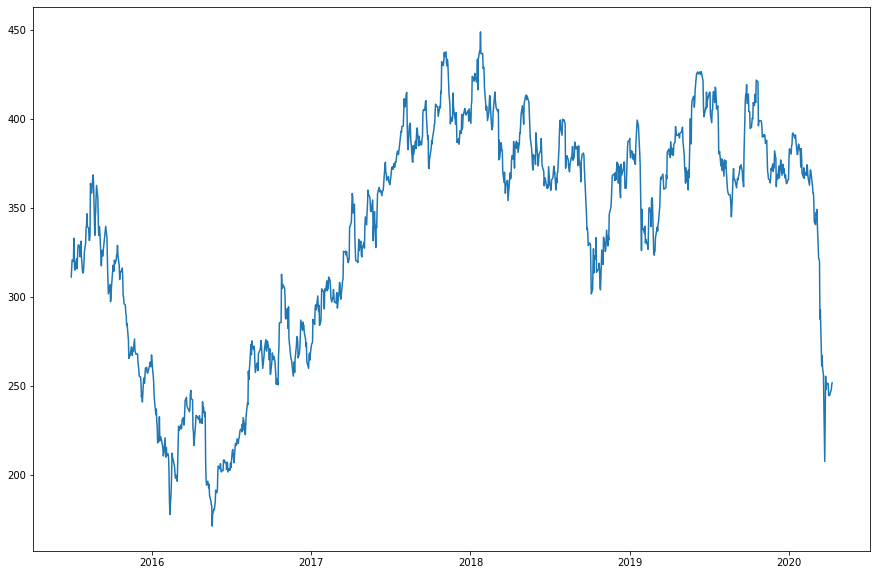

In [11]:
#plot
plt.plot(df['date'],df['close'], label='Close Price history')

In [12]:
# Get the Adjusted Close Price
df = df[['date','wr',	'moving_avg'	,'RSI',	'stoch','adj_close']]
#Take a look at the new data
print (df)

           date         wr  moving_avg        RSI      stoch   adj_close
0    2015-07-01 -22.580994  311.299988   0.000000  77.419006  303.809296
1    2015-07-02 -23.600098  313.674988   0.000000  76.399902  308.445007
2    2015-07-03 -25.714349  316.049988   0.000000  74.285651  313.080688
3    2015-07-06 -29.350618  317.062492   0.000000  70.649382  312.397553
4    2015-07-07  -5.851148  320.259991  93.137435  94.148852  325.035919
...         ...        ...         ...        ...        ...         ...
1169 2020-04-01 -57.735080  255.099999  33.572445  42.784031  244.800003
1170 2020-04-03 -57.215969  252.243333  33.572445  52.022402  244.800003
1171 2020-04-07 -43.870563  249.266667  35.331183  56.129437  248.100006
1172 2020-04-08 -40.448037  248.563334  36.824605  68.357152  250.850006
1173 2020-04-09 -30.142866  247.546667  37.415849  77.007864  251.899994

[1174 rows x 6 columns]


## Preprocessing-

In [0]:
df=df.dropna()

Choosing the features to be used in prediction:

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)
y1 = pd.qcut(df['adj_close'], 3, labels=['0', '1', '2']).cat.codes

In [15]:
X

,wr,moving_avg,RSI,stoch
0,-22.580994,311.299988,0.000000,77.419006
1,-23.600098,313.674988,0.000000,76.399902
2,-25.714349,316.049988,0.000000,74.285651
3,-29.350618,317.062492,0.000000,70.649382
4,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...
1169,-57.735080,255.099999,33.572445,42.784031
1170,-57.215969,252.243333,33.572445,52.022402
1171,-43.870563,249.266667,35.331183,56.129437
1172,-40.448037,248.563334,36.824605,68.357152


In [16]:
y1

0       0
1       0
2       1
3       1
4       1
       ..
1169    0
1170    0
1171    0
1172    0
1173    0
Length: 1174, dtype: int8

In [0]:
X_train=X[:int(0.8*len(X))]
X_train_date=df['date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]
y_train1=y1[:int(0.8*len(y))]
y_test1=y1[int(0.8*len(y)):]

In [0]:
minn=np.min(X_train)
maxx=np.max(X_train)
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-minn)/(maxx-minn)

## Visualizing the train-test split-

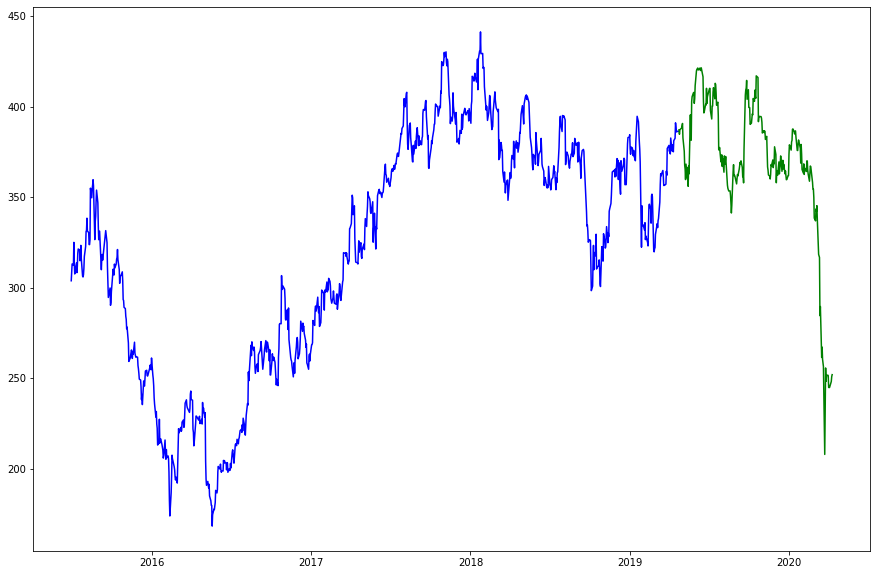

In [19]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')

## SVR BASE LEARNER-

In [20]:
svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin.fit(X_train, y_train)
svr_poly.fit(X_train,y_train)
svr_rbf.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_svr_lin=svr_lin.predict(X_test)
y_svr_poly=svr_poly.predict(X_test)
y_svr_rbf=svr_rbf.predict(X_test)

## SVR RMS error-

In [22]:
error_svr_lin=np.sqrt(np.mean(np.square(y_svr_lin-y_test)))
error_svr_lin

10.000727171643938

In [23]:
error_svr_poly=np.sqrt(np.mean(np.square(y_svr_poly-y_test)))
error_svr_poly

12.278215577645279

In [24]:
error_svr_rbf=np.sqrt(np.mean(np.square(y_svr_rbf-y_test)))
error_svr_rbf

9.756782501254126

## Visualizing the performance of SVR-

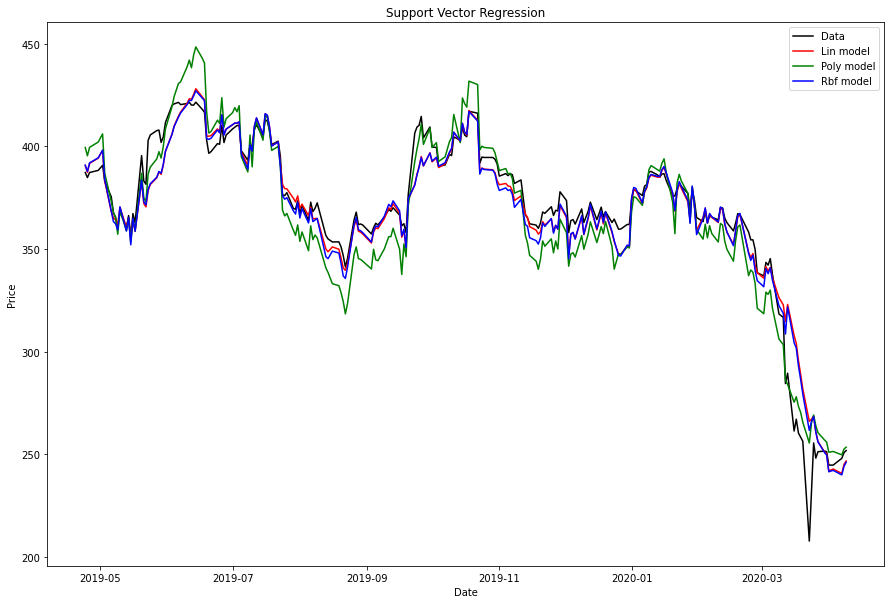

In [25]:
plt.plot(X_test_date, y_test, c='k', label='Data')
y_svr_lin=svr_lin.predict(X_test)
plt.plot(X_test_date, y_svr_lin, c='r', label='Lin model') 
plt.plot(X_test_date, y_svr_poly, c='g', label='Poly model') 
plt.plot(X_test_date, y_svr_rbf, c='b', label='Rbf model') 

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## ARIMA BASE LEARNER and RMS error-

In [26]:
from sklearn.metrics import mean_squared_error

history =y_train
print(type(history))
predictions = np.array([])
for t in range(len(y_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions=np.append(predictions,yhat)
    obs = y_test[t]
    history=np.append(history,obs)
error_arima = np.sqrt(np.mean(np.square(predictions-y_test)))
print('RMS error: ',error_arima)

<class 'numpy.ndarray'>
RMS error:  8.218445564646522


## ARIMA performance-

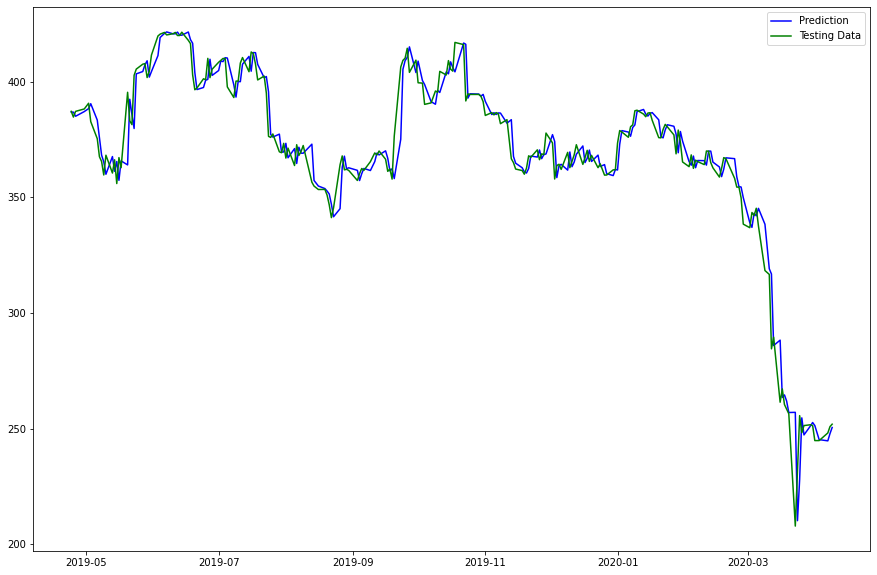

In [27]:
plt.plot(X_test_date,predictions, 'blue', label='Prediction')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.legend()
plt.show()

##Using SVR Linear as Base learner for ensemble

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
regr_lin = BaggingRegressor(svr_lin,n_estimators=200, random_state=0).fit(X_train, y_train)

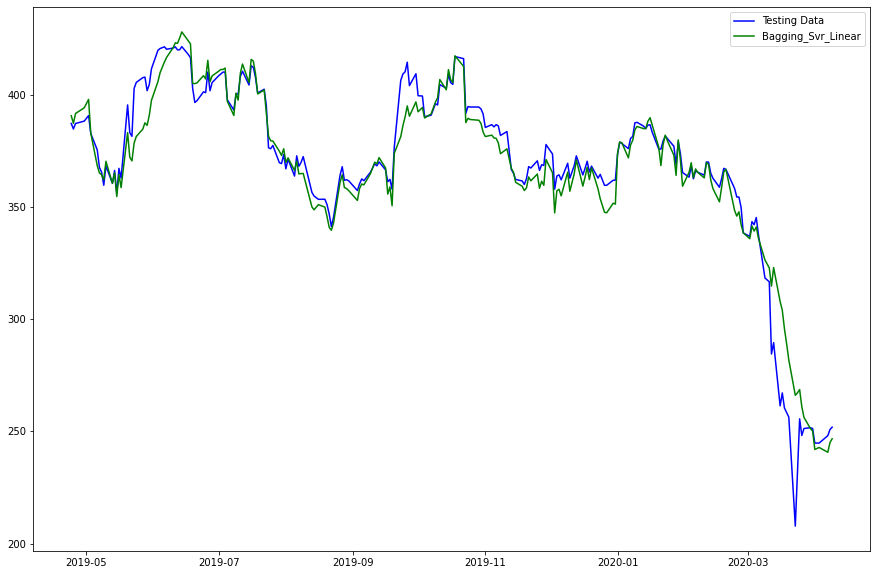

Rms after performing bagging on svr Linear:  9.988506044041221
Rms of svr Linear:  10.000727171643938


In [36]:
y_bagged_svr_lin=regr_lin.predict(X_test)
rms_baggingSVR_lin=np.sqrt(np.mean(np.square(y_bagged_svr_lin-y_test)))
plt.plot(X_test_date,y_test, 'blue', label='Testing Data')
plt.plot(X_test_date,y_bagged_svr_lin, 'green', label='Bagging_Svr_Linear')
plt.legend()
plt.show()

print('Rms after performing bagging on svr Linear: ',rms_baggingSVR_lin)
print('Rms of svr Linear: ',error_svr_lin)

##Using SVR Poly as Base learner for ensemble

In [0]:
regr_poly = BaggingRegressor(svr_poly,n_estimators=40, random_state=0).fit(X_train, y_train)

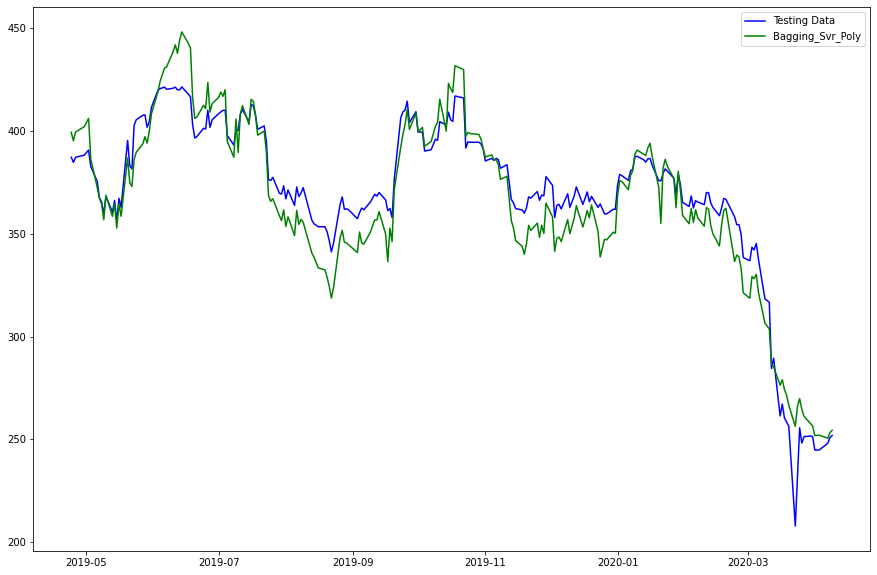

Rms after performing bagging on svr polynomial:  12.274768153601585
Rms of svr polynomial:  12.278215577645279


In [35]:
y_bagged_svr_poly=regr_poly.predict(X_test)
rms_baggingSVR_poly=np.sqrt(np.mean(np.square(y_bagged_svr_poly-y_test)))
plt.plot(X_test_date,y_test, 'blue', label='Testing Data')
plt.plot(X_test_date,y_bagged_svr_poly, 'green', label='Bagging_Svr_Poly')
plt.legend()
plt.show()

print('Rms after performing bagging on svr polynomial: ',rms_baggingSVR_poly)
print('Rms of svr polynomial: ',error_svr_poly)

##Using SVR Rbf as Base learner for ensemble

In [0]:
regr_rbf =BaggingRegressor(svr_rbf,n_estimators=10, random_state=0).fit(X_train, y_train)

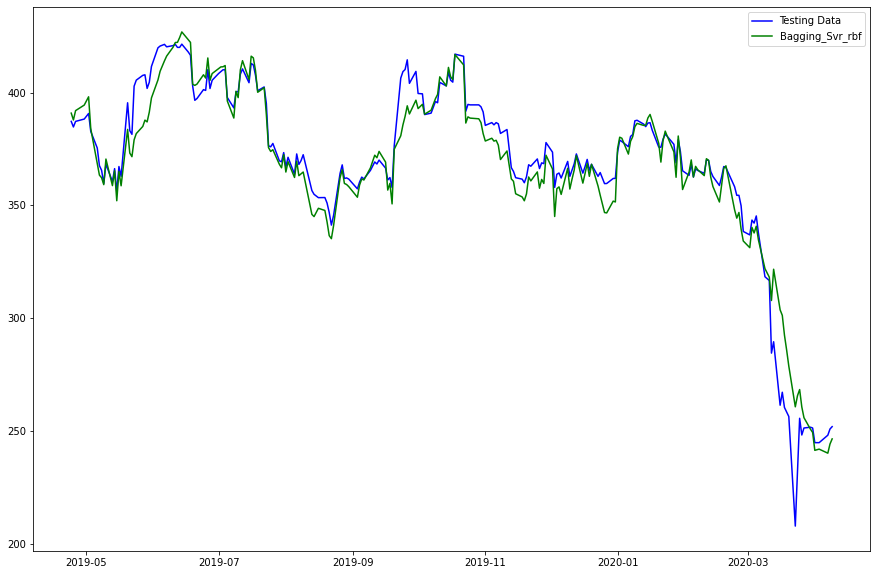

Rms after performing bagging on svr rbf:  9.6900451086029
Rms of svr rbf:  9.756782501254126


In [34]:
y_bagged_svr_rbf=regr_rbf.predict(X_test)
rms_baggingSVR_rbf=np.sqrt(np.mean(np.square(y_bagged_svr_rbf-y_test)))
plt.plot(X_test_date,y_test, 'blue', label='Testing Data')
plt.plot(X_test_date,y_bagged_svr_rbf, 'green', label='Bagging_Svr_rbf')
plt.legend()
plt.show()

print('Rms after performing bagging on svr rbf: ',rms_baggingSVR_rbf)
print('Rms of svr rbf: ',error_svr_rbf)